$\textbf{Introducción}$

$\textbf{Atractor de Lorenz:}$ Se trata de un sistema tridimensional determinista con comportamiento caótico, utilizado para estudiar la atmósfera terrestre.



$\textbf{Implementación en Python:}$ Se utiliza la función $\texttt{solve\_lorenz}$ para simular el sistema con parámetros específicos y la función \texttt{odeint} para resolver las ecuaciones diferenciales.



$\textbf{Visualización 3D:}$ Se crean gráficas tridimensionales utilizando $\texttt{matplotlib}$ y la paleta de colores $\texttt{plasma}$ para representar las soluciones del sistema.



$\textbf{Variación de Parámetros:}$ Se exploran diferentes valores del parámetro $\rho$ y se almacenan las soluciones correspondientes, generando múltiples visualizaciones en una figura de 2x2 subplots.



$\textbf{Formalismo y algoritmos}$ 


 * $ \textbf{Definición del sistema:}$ El atractor de Lorenz es un sistema tridimensional determinista y caótico, descrito por las ecuaciones diferenciales de Lorenz. Los parámetros físicos son $\sigma$, $\rho$ y $\beta$.


* $\textbf{Implementación en Python:}$ Se define la función $\texttt{solve\_lorenz}$ que calcula las derivadas del sistema en un estado dado $(x, y, z)$ y con parámetros específicos. Se utiliza la función $\texttt{odeint}$ para integrar estas ecuaciones en el tiempo.

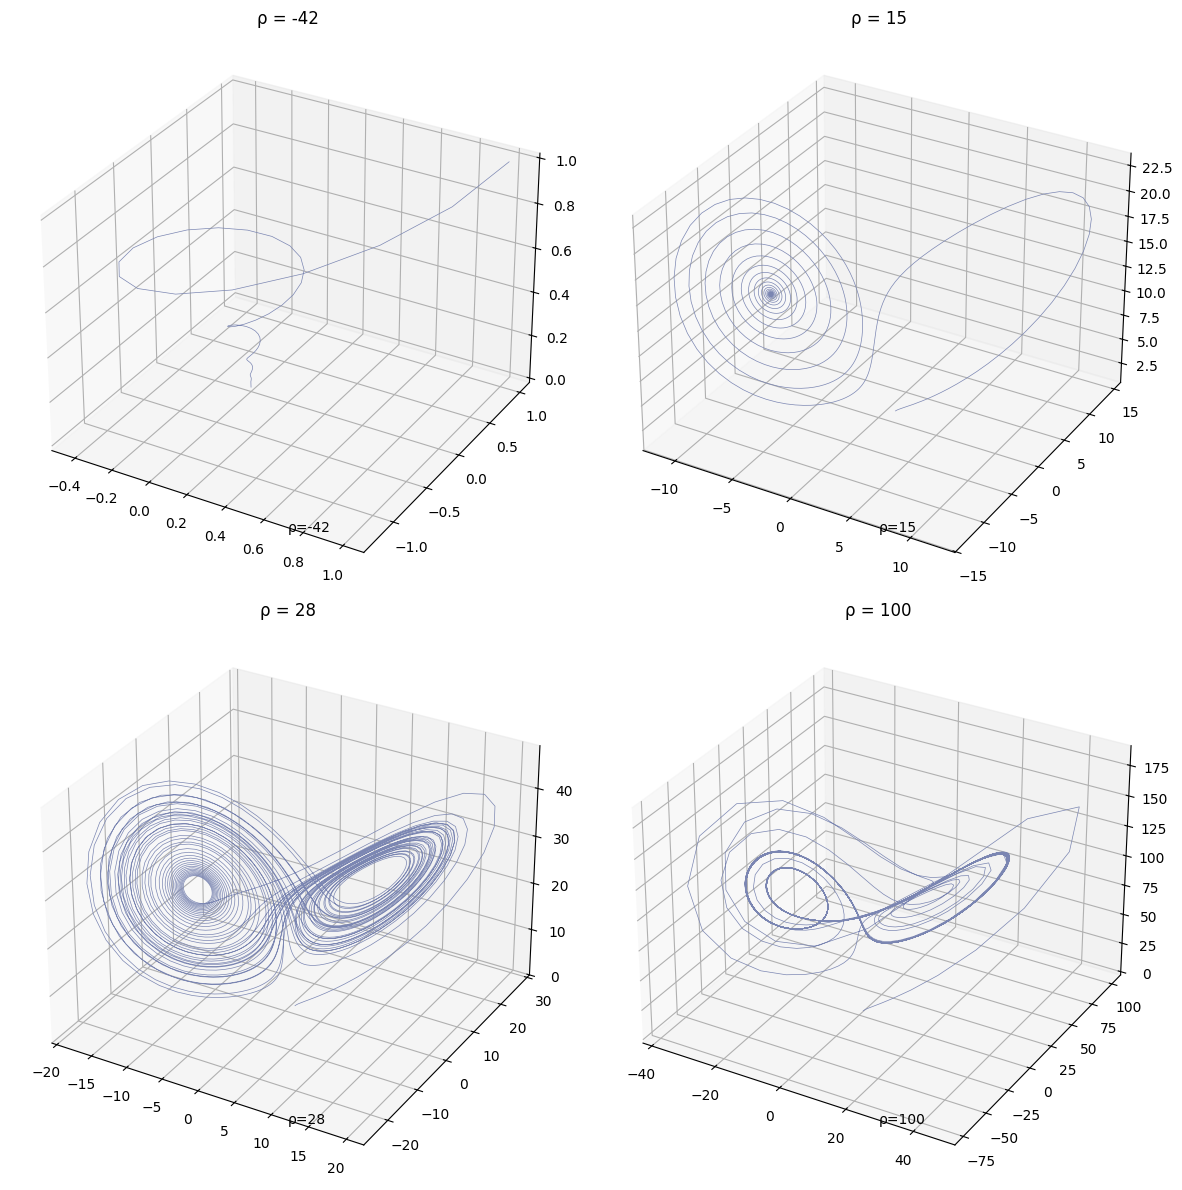

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Función que define el sistema Lorenz
def solve_lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = (x * y) - (β * z)
    return dx, dy, dz

# Función para resolver y graficar el atractor Lorenz
def lorenz_attractor(initial_state, params, t=np.linspace(0, 50, 3000), ax=None, text_offset=0.1):
    σ, ρ, β = params
    # Resolver el sistema de ecuaciones diferenciales
    states = odeint(solve_lorenz, initial_state, t, args=(σ, ρ, β))
    
    # Extraer las coordenadas
    xs, ys, zs = states[:, 0], states[:, 1], states[:, 2]
    
    # Graficar si se proporciona un eje
    if ax is not None:
        ax.plot(xs, ys, zs, lw=0.5, c='#7B86B2')
        ax.set_title(f"ρ = {ρ}")
        ax.text2D(0.5, text_offset, f"ρ={ρ}", transform=ax.transAxes, fontsize=10)
    
    return states  # Devolver la solución para uso adicional

# Valores iniciales
initial_state = (1., 1., 1.)
σ, β = 10, 8/3
rho_values = [-42, 15, 28, 100]

# Crear una figura con subgráficos 3D
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 12), subplot_kw={'projection': '3d'})

# Convertir rho_values en un arreglo bidimensional para iterar por filas y columnas
rho_values_2d = np.array(rho_values).reshape(rows, cols)

# Iterar sobre los índices (row, col) y resolver el atractor Lorenz para cada ρ
for row, col in np.ndindex((rows, cols)):
    rho = rho_values_2d[row, col]
    lorenz_attractor(initial_state, (σ, rho, β), ax=axs[row, col])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


#### Análisis crítico
El proceso de implementación y análisis del atractor de Lorenz nos ha permitido aprender y reforzar varios conceptos clave en la programación y la teoría de sistemas dinámicos. Comprensión un poco más profunda del concepto del caos y sistemas dinámicos, y dentro de esto a resolver ODEs y algo de teoría del caos.
Uno de los desafíos fue asegurar la estabilidad numérica de las soluciones. Se aprendió la importancia de elegir adecuadamente los parámetros de integración y las condiciones iniciales.
El estudio del atractor de Lorenz no solo ha proporcionado una comprensión más profunda de los sistemas caóticos y las ecuaciones diferenciales, sino que también ha mejorado las habilidades de programación y visualización de datos en Python. Este proyecto ha demostrado la importancia de la exploración de parámetros y el análisis crítico en la comprensión de sistemas complejos
